In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
print(nx.__version__)

2.5


In [12]:
df = pd.read_csv('subcategories.txt',delimiter='\t')
df.columns = df.columns.str.strip() 
print(df.columns)

Index(['Cat', 'SubCat', 'SubCatName', 'CatNameShort', 'CatNameLong'], dtype='object')


In [20]:
G = nx.Graph()

for _, row in df.iterrows():
    # node label for the category
    cat_node = f"Cat_{row['Cat']}"
    # node label for the subcategory
    subcat_node = f"SubCat_{row['SubCat']}"

    # Add the category node
    G.add_node(
        cat_node,
        cat_id=row['Cat'],
        cat_name_short=row['CatNameShort'],
        cat_name_long=row['CatNameLong'],
        display_label=f"{row['Cat']} - {row['CatNameShort']}"
    )

    # Add the subcategory node
    G.add_node(
        subcat_node,
        subcat_id=row['SubCat'],
        subcat_name=row['SubCatName'],
        # Again, store a "display_label"
        display_label=f"{row['SubCat']} - {row['SubCatName']}"
    )

    # Edge between category and subcategory
    G.add_edge(cat_node, subcat_node)


In [14]:
components = list(nx.connected_components(G))
num_components = len(components)
print("Number of connected components:", num_components)

Number of connected components: 6


In [15]:
# diameter
largest_cc = max(components, key=len)  # the component with most nodes
G_lcc = G.subgraph(largest_cc)
diameter_lcc = nx.diameter(G_lcc)
print("Diameter (largest connected component):", diameter_lcc)


Diameter (largest connected component): 2


In [36]:
avg_path_length = nx.average_shortest_path_length(G_lcc)
print("Average shortest path length (LCC):", avg_path_length)

density = nx.density(G_lcc)
print("Density (largest connected component):", density)

Average shortest path length (LCC): 1.8
Density (largest connected component): 0.2


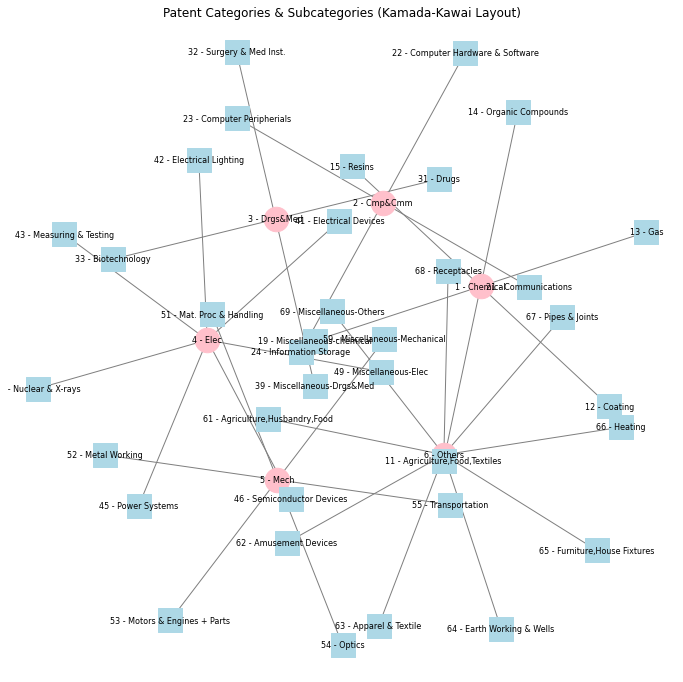

In [34]:
pos = nx.kamada_kawai_layout(G, scale=3)

plt.figure(figsize=(12, 12))

cat_nodes = [n for n, d in G.nodes(data=True) if d.get('cat_id') is not None]
subcat_nodes = [n for n, d in G.nodes(data=True) if d.get('subcat_id') is not None]


nx.draw_networkx_nodes(G, pos, nodelist=cat_nodes, node_color="pink", node_shape="o",node_size=600)
nx.draw_networkx_nodes(G, pos, nodelist=subcat_nodes, node_color="lightblue", node_shape="s",node_size=600)

nx.draw_networkx_edges(G, pos, edge_color="gray")

labels = nx.get_node_attributes(G, 'display_label')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.title("Patent Categories & Subcategories (Kamada-Kawai Layout)")
plt.axis('off')
plt.show()
